<a href="https://colab.research.google.com/github/OKJAHR/diabetes_classification/blob/main/Diyabet_Hastal%C4%B1%C4%9F%C4%B1_S%C4%B1n%C4%B1fland%C4%B1rmas%C4%B1_%5BYSA%5D_201505045.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kütüphaneleri Çağırdık
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [ ]:
# Verimizi yükleyip çağırdık
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Veriyi inceleyelim
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

<ipython-input-79-54c25bc56c1a>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<Axes: >

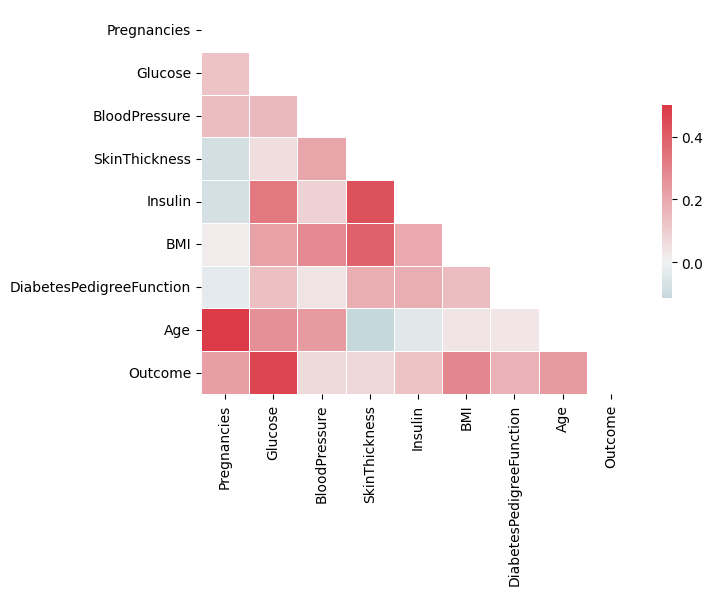

In [ ]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
liste=["Diyabeti yok","Diyabeti var"]
diyabet_mi = data["Outcome"].value_counts().tolist()
values = [diyabet_mi[0], diyabet_mi[1]]
fig = px.pie(values=data['Outcome'].value_counts(), names=liste , width=800, height=400, color_discrete_sequence=["black","pink"]
             ,title="Diyabet Hastası Olup Olmaması Arasındaki Yüzde")
fig.show()

In [ ]:
plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [ ]:
fig = px.bar(data['Age'].value_counts(), height=400, width = 700) 
fig.show()

<ipython-input-83-abb7719b907d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Glucose', ylabel='Density'>

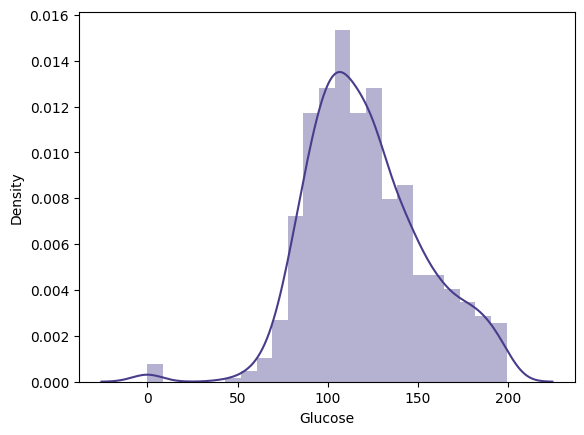

In [ ]:
sns.distplot(data['Glucose'],color ="DarkSlateBlue" )

<ipython-input-84-012e23af502a>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='BloodPressure', ylabel='Density'>

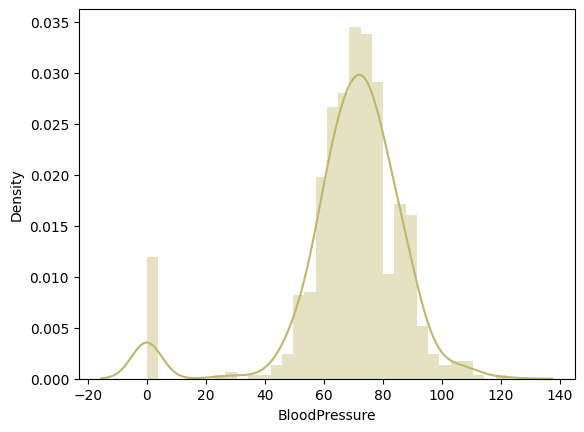

In [ ]:
sns.distplot(data['BloodPressure'], color = 'DarkKhaki')

<ipython-input-85-ea712ab3bb62>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Insulin', ylabel='Density'>

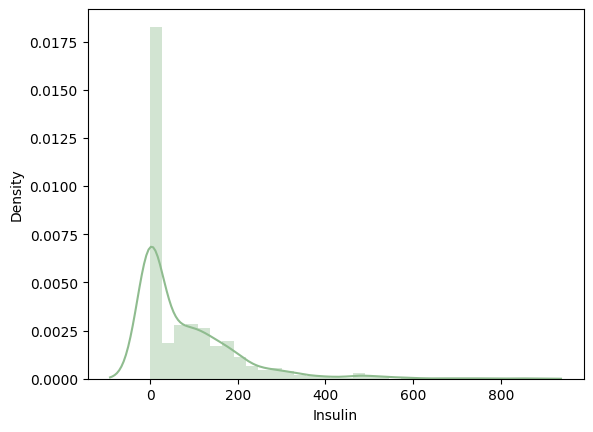

In [ ]:
sns.distplot(data['Insulin'],color ="DarkSeaGreen" )

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop(['Outcome'] , axis = 1).values
y = data['Outcome' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#Gerekli modeli kur
model = Sequential()

In [ ]:

model.add(Dense(20,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train,batch_size=10,epochs=200)

Epoch 1/200
62/62 [==============================] - 2s 4ms/step - loss: 0.6614 - accuracy: 0.6580
Epoch 2/200
62/62 [==============================] - 0s 7ms/step - loss: 0.6372 - accuracy: 0.6547
Epoch 3/200
62/62 [==============================] - 1s 11ms/step - loss: 0.6268 - accuracy: 0.6498
Epoch 4/200
62/62 [==============================] - 1s 11ms/step - loss: 0.6143 - accuracy: 0.6466
Epoch 5/200
62/62 [==============================] - 1s 8ms/step - loss: 0.6043 - accuracy: 0.6824
Epoch 6/200
62/62 [==============================] - 1s 10ms/step - loss: 0.5915 - accuracy: 0.6857
Epoch 7/200
62/62 [==============================] - 1s 10ms/step - loss: 0.5776 - accuracy: 0.7052
Epoch 8/200
62/62 [==============================] - 1s 9ms/step - loss: 0.5647 - accuracy: 0.7362
Epoch 9/200
62/62 [==============================] - 0s 6ms/step - loss: 0.5530 - accuracy: 0.7150
Epoch 10/200
62/62 [==============================] - 0s 4ms/step - loss: 0.5417 - accuracy: 0.7248
Epoch

<Axes: >

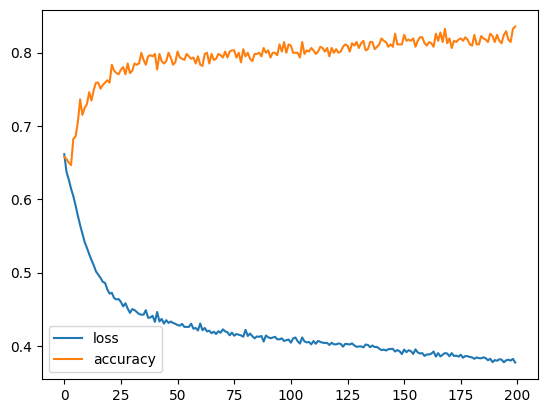

In [ ]:
model_hist = pd.DataFrame(model.history.history)
model_hist.plot()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
prediction = model.predict(x_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] 


5/5 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

